# **ARTIFICIAL INTELLINGENCE ASSIGNMENT 2025**

This notebook contains the contents of Questions :

1. *Search Algorithms - Informed Search*
2. *CSP-Travel Salesperson Problem: Simulated Annealing*
3. *Adversarial Search*
4. *MDPs – Q-learning*

                                                                                                                                                                                                     


# **QUEATION 1:Search Algorithms - Informed Search**

In this question we used to Informed Search algorithms to get the path from the initial state A to the goal state B in a maze environment   
the 2 Algorithms we used are :  
***Gready Best-First Search*** and ***A Search***




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


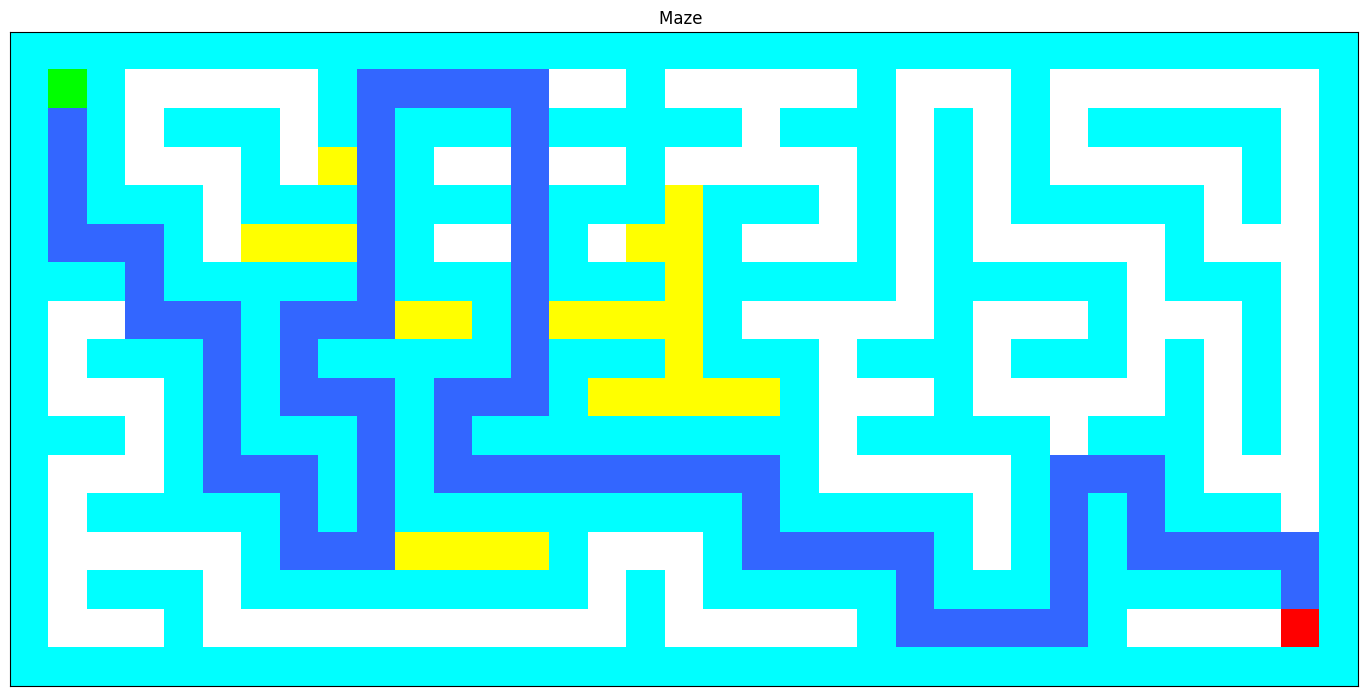

In [11]:
import heapq
import matplotlib.pyplot as plt
import numpy as np


maze3 = """
###################################
#A#     #       #     #   #       #
# # ### # ### ##### ### # # ##### #
# #   #   #     #     # # #     # #
# ### ### ### ### ### # # ##### # #
#   #     #   #   #   # #     #   #
### ##### ### ### ##### ##### ### #
#     #     #     #     #   #   # #
# ### # ##### ### ### ### ### # # #
#   # #   #   #     #   #     # # #
### # ### # ######### ##### ### # #
#   #   # #         #     #   #   #
# ##### # ######### ##### # # ### #
#     #       #   #     # # #     #
# ### ######### # ##### ### ##### #
#   #           #     #     #    B#
###################################
"""

with open("testmaze.txt", "w") as f:
    f.write(maze3.strip())


class Maze:
    def __init__(self, filename):
        self.grid = []
        with open(filename, 'r') as f:
            for row in f:
                self.grid.append(list(row.strip()))

        self.height = len(self.grid)
        self.width = len(self.grid[0])
        self.start, self.goal = None, None
        self.walls = set()

        for row in range(self.height):
            for col in range(self.width):
                if self.grid[row][col] == 'A':
                    self.start = (row, col)
                elif self.grid[row][col] == 'B':
                    self.goal = (row, col)
                elif self.grid[row][col] == '#':
                    self.walls.add((row, col))

        if self.start is None or self.goal is None:
            raise Exception("Maze must have start (A) and goal (B).")

    def neighbors(self, state):
        row, col = state
        directions = [("up", (-1, 0)), ("down", (1, 0)),
                      ("left", (0, -1)), ("right", (0, 1))]
        result = []

        for action, (dr, dc) in directions:
            new_row, new_col = row + dr, col + dc
            if (0 <= new_row < self.height and
                0 <= new_col < self.width and
                (new_row, new_col) not in self.walls):
                result.append((action, (new_row, new_col)))

        return result

class Node:
    def __init__(self, state, parent=None, action=None, cost=0):
        self.state = state  # (row, col)
        self.parent = parent
        self.action = action
        self.cost = cost

    def __lt__(self, other):
        return self.cost < other.cost




def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])



def solve(maze, algorithm="greedy best-first search"):
    start_node = Node(maze.start, cost=0)
    frontier = []
    explored = set()

    if algorithm == "greedy best-first search":
        heapq.heappush(frontier, (manhattan_distance(start_node.state, maze.goal), start_node))
    elif algorithm == "A* search":
        heapq.heappush(frontier, (start_node.cost + manhattan_distance(start_node.state, maze.goal), start_node))
    else:
        raise ValueError("Algorithm must be 'greedy best-first search' or 'A* search'.")

    while frontier:
        _, current = heapq.heappop(frontier)

        if current.state == maze.goal:
            path = []
            while current.parent:
                path.append(current.state)
                current = current.parent
            path.reverse()
            return path, explored

        explored.add(current.state)

        for action, state in maze.neighbors(current.state):
            if state in explored:
                continue
            child = Node(state=state, parent=current, action=action, cost=current.cost + 1)

            if algorithm == "greedy best-first search":
                priority = manhattan_distance(state, maze.goal)
            else:  # A*
                priority = child.cost + manhattan_distance(state, maze.goal)

            heapq.heappush(frontier, (priority, child))

    raise Exception("No path found.")



def visualize_maze(maze, path, explored, filename="maze_1.png"):
    rows, cols = len(maze.grid), len(maze.grid[0])
    image = np.ones((rows, cols, 3))  # Start with white cells

    for r in range(rows):
        for c in range(cols):
            if maze.grid[r][c] == "#":
                image[r, c] = [0,4,3]  # Black for wall
            elif (r, c) in explored:
                image[r, c] = [1, 1, 0]  # Yellow for explored

    for r, c in path:
        image[r, c] = [0.2, 0.4, 1]  # Blue for optimal path

    start_r, start_c = maze.start
    goal_r, goal_c = maze.goal
    image[start_r, start_c] = [0, 1, 0]   # Green for start (A)
    image[goal_r, goal_c] = [1, 0, 0]     # Red for goal (B)

    # Plotting
    plt.figure(figsize=(cols / 2, rows / 2))
    plt.imshow(image, interpolation='nearest')
    plt.xticks([]), plt.yticks([])
    plt.title("Maze ")
    plt.savefig(filename)
    plt.show()




def print_maze(maze, path, explored):
    result = []

    for row in range(maze.height):
        line = []
        for col in range(maze.width):
            cell = (row, col)
            if cell == maze.start:
                line.append('A')
            elif cell == maze.goal:
                line.append('B')
            elif cell in path:
                line.append('*')
            elif cell in explored:
                line.append('.')
            elif cell in maze.walls:
                line.append('#')
            else:
                line.append(' ')
        result.append("".join(line))

    print("\n".join(result))

m = Maze("maze.txt")
path, explored = solve(m, algorithm="greedy best-first search")  
visualize_maze(m, path, explored, filename="maze_1.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.0].


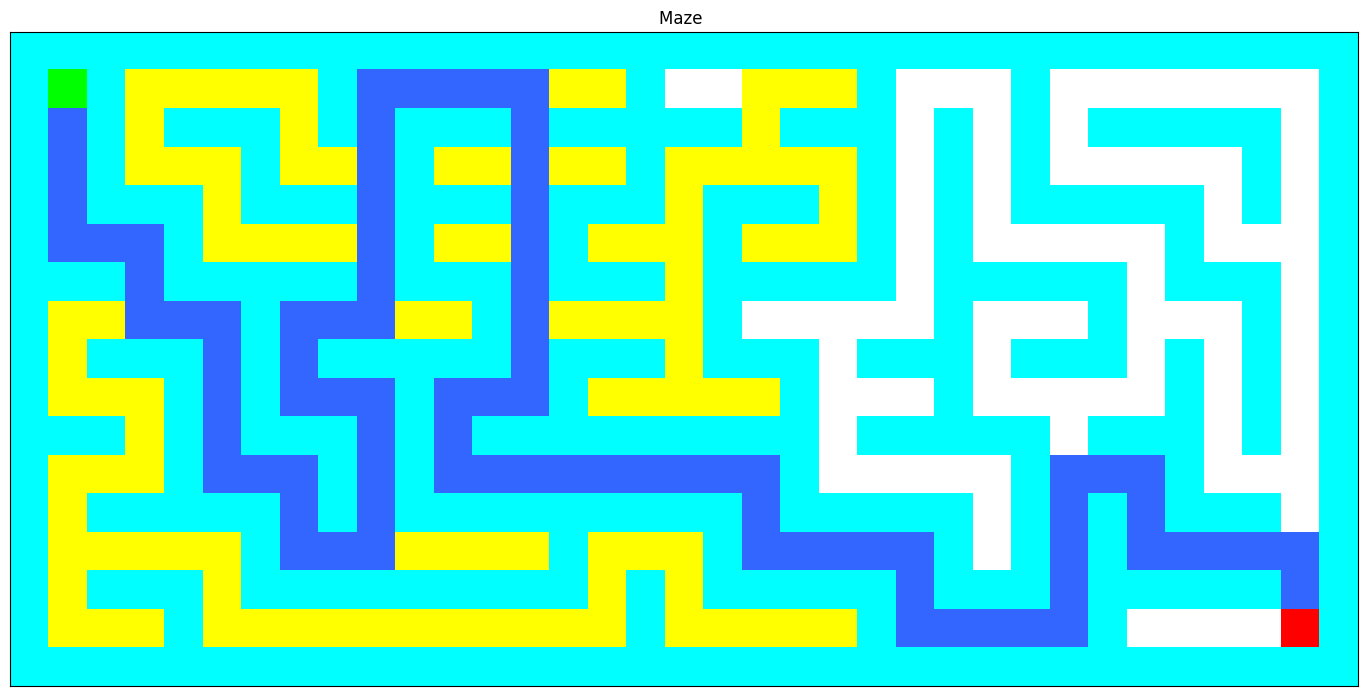

In [12]:
m = Maze("maze.txt")
path, explored = solve(m, algorithm="A* search")  
visualize_maze(m, path, explored, filename="maze_1.png")


